In [58]:
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import norm, skew
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn as sk
from xgboost import XGBRegressor

## 讀入資料

In [59]:
train = pd.read_csv('C:\\Users\\ASUS\\Desktop\\house-prices-advanced-regression-techniques\\train.csv')
test = pd.read_csv('C:\\Users\\ASUS\\Desktop\\house-prices-advanced-regression-techniques\\test.csv')
submission = pd.read_csv('C:\\Users\\ASUS\\Desktop\\house-prices-advanced-regression-techniques\\sample_submission.csv')

In [60]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [62]:
c_train = train.copy()
c_test = test.copy()

In [63]:
with_null=pd.concat([c_train,c_test],axis=0,sort=False)
with_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [64]:
Null_val = [(c, with_null[c].isna().mean()*100) for c in with_null]
type(Null_val)

list

In [65]:
Null_val=pd.DataFrame(Null_val,columns=['colname','percentage'])
Null_val.sort_values(by=['percentage'],ascending=False)

,colname,percentage
72,PoolQC,99.657417
74,MiscFeature,96.402878
6,Alley,93.216855
73,Fence,80.438506
80,SalePrice,49.982871
...,...,...
43,1stFlrSF,0.000000
44,2ndFlrSF,0.000000
45,LowQualFinSF,0.000000
46,GrLivArea,0.000000


## picturing EDA

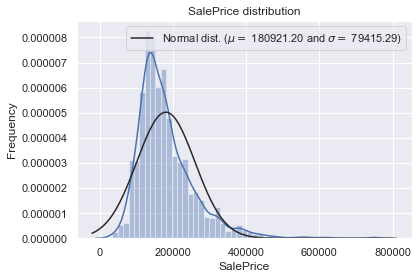

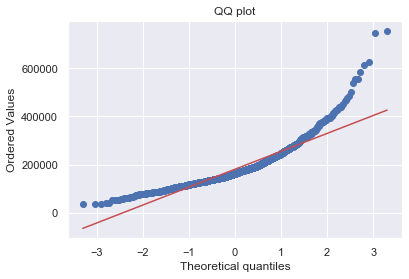

Skewness: 1.882876
Kurtosis: 6.536282


In [66]:
sns.distplot(c_train['SalePrice'],fit=norm)
mu, sigma = norm.fit(c_train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(c_train['SalePrice'], plot=plt)
plt.title('QQ plot')
plt.show()

print("Skewness: %f" % c_train['SalePrice'].skew())
print("Kurtosis: %f" % c_train['SalePrice'].kurt())

SalePrice不是常態分佈
需要做log-transforming

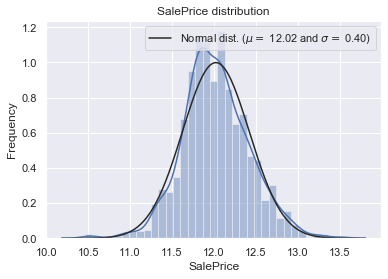

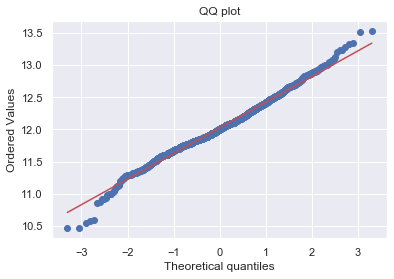

Skewness: 0.121347
Kurtosis: 0.809519


In [67]:
c_train["SalePrice"] = np.log1p(c_train["SalePrice"])

sns.distplot(c_train['SalePrice'],fit=norm)
mu, sigma = norm.fit(c_train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(c_train['SalePrice'], plot=plt)
plt.title('QQ plot')
plt.show()

print("Skewness: %f" % c_train['SalePrice'].skew())
print("Kurtosis: %f" % c_train['SalePrice'].kurt())

with_null=pd.concat([c_train,c_test],axis=0,sort=False)

#### heatmap

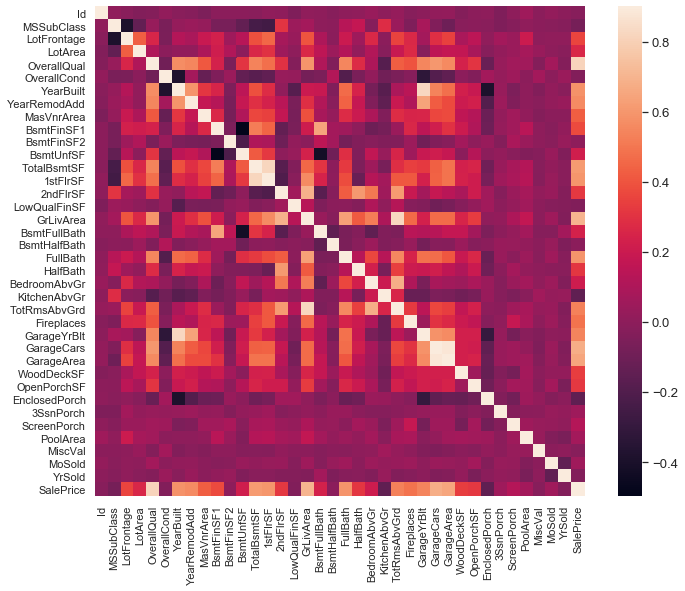

In [68]:
corrmat = c_train.corr()
plt.subplots(figsize=(12,9))
sns.set(font_scale=1.2)
sns.heatmap(corrmat, vmax=0.9, square=True)

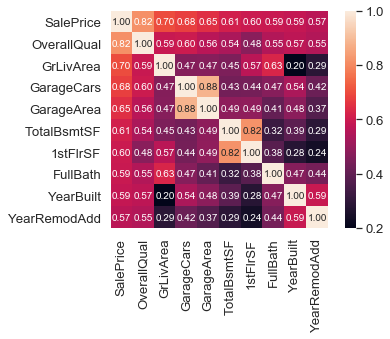

In [69]:
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(c_train[cols].values.T)
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

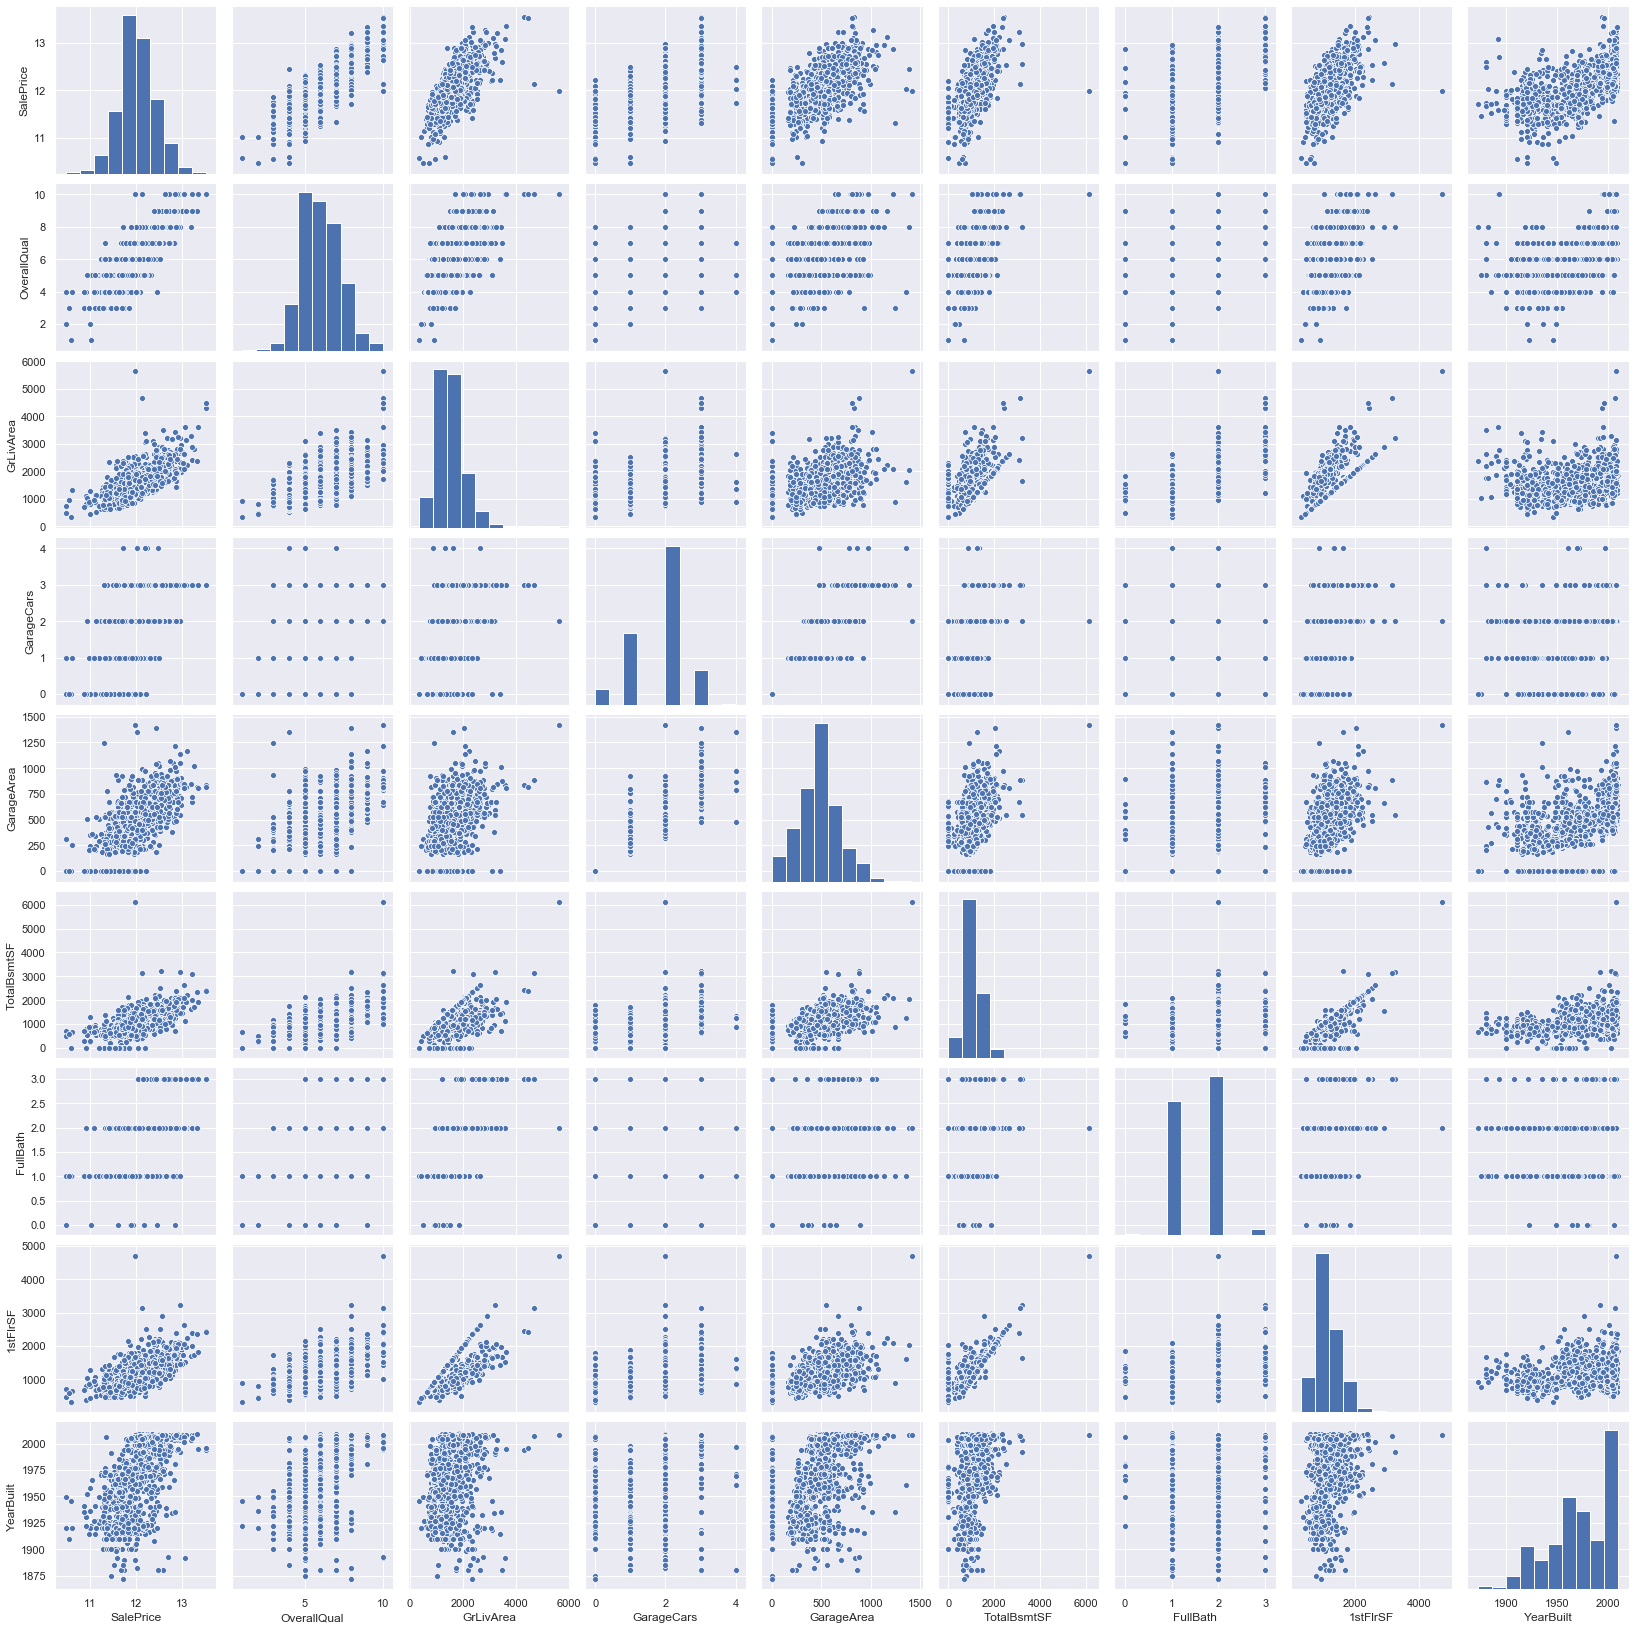

In [70]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF', 'FullBath', '1stFlrSF', 'YearBuilt']
sns.pairplot(c_train[cols])
plt.show()

## Missing Value

In [71]:
with_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [72]:
with_null.groupby('MSZoning').count()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSZoning,,,,,,,,,,,,,,,,,,,,,
C (all),25,25,23,25,25,3,25,25,25,25,...,25,0,3,2,25,25,25,25,25,10
FV,139,139,119,139,139,52,139,139,139,139,...,139,0,2,0,139,139,139,139,139,65
RH,26,26,23,26,26,4,26,26,26,26,...,26,0,3,1,26,26,26,26,26,16
RL,2265,2265,1839,2265,2265,40,2265,2265,2264,2265,...,2265,10,456,91,2265,2265,2265,2264,2265,1151
RM,460,460,426,460,460,99,460,460,460,460,...,460,0,107,11,460,460,460,460,460,218


In [73]:
with_null['MSZoning']=with_null['MSZoning'].fillna(with_null['MSZoning'].mode()[0])
with_null.groupby('MSZoning').count()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSZoning,,,,,,,,,,,,,,,,,,,,,
C (all),25,25,23,25,25,3,25,25,25,25,...,25,0,3,2,25,25,25,25,25,10
FV,139,139,119,139,139,52,139,139,139,139,...,139,0,2,0,139,139,139,139,139,65
RH,26,26,23,26,26,4,26,26,26,26,...,26,0,3,1,26,26,26,26,26,16
RL,2269,2269,1842,2269,2269,40,2269,2269,2267,2269,...,2269,10,456,91,2269,2269,2269,2268,2269,1151
RM,460,460,426,460,460,99,460,460,460,460,...,460,0,107,11,460,460,460,460,460,218


In [74]:
with_null["LotFrontage"] = with_null.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [75]:
with_null['Alley'] = with_null['Alley'].fillna('None')

In [76]:
with_null['Utilities'] = with_null['Utilities'].fillna(with_null['Utilities'].mode()[0])

In [77]:
with_null['Exterior1st'] = with_null['Exterior1st'].fillna(with_null['Exterior1st'].mode()[0])
with_null['Exterior2nd'] = with_null['Exterior2nd'].fillna(with_null['Exterior2nd'].mode()[0])

In [78]:
with_null["MasVnrType"] = with_null["MasVnrType"].fillna("None")
with_null["MasVnrArea"] = with_null["MasVnrArea"].fillna(0)

In [79]:
with_null["BsmtQual"] = with_null["BsmtQual"].fillna("None")
with_null["BsmtCond"] = with_null["BsmtCond"].fillna("None")
with_null["BsmtExposure"] = with_null["BsmtExposure"].fillna("None")
with_null["BsmtFinType1"] = with_null["BsmtFinType1"].fillna("None")
with_null["BsmtFinType2"] = with_null["BsmtFinType2"].fillna("None")
with_null["BsmtFinSF1"] = with_null["BsmtFinSF1"].fillna(0)
with_null["BsmtFinSF2"] = with_null["BsmtFinSF2"].fillna(0)
with_null["TotalBsmtSF"] = with_null["TotalBsmtSF"].fillna(0)
with_null["BsmtFullBath"] = with_null["BsmtFullBath"].fillna(0)
with_null["BsmtHalfBath"] = with_null["BsmtHalfBath"].fillna(0)
with_null["BsmtUnfSF"] = with_null["BsmtUnfSF"].fillna(0)

In [80]:
with_null["Electrical"] = with_null["Electrical"].fillna(with_null['Electrical'].mode()[0])

In [81]:
with_null["KitchenQual"] = with_null["KitchenQual"].fillna(with_null['KitchenQual'].mode()[0])

In [82]:
with_null["Functional"] = with_null["Functional"].fillna("Typ")

In [83]:
with_null["FireplaceQu"] = with_null["FireplaceQu"].fillna("None")

In [84]:
with_null["GarageType"] = with_null["GarageType"].fillna("None")
with_null["GarageFinish"] = with_null["GarageFinish"].fillna("None")
with_null["GarageQual"] = with_null["GarageQual"].fillna("None")
with_null["GarageCond"] = with_null["GarageCond"].fillna("None")
with_null["GarageYrBlt"] = with_null["GarageYrBlt"].fillna(0)
with_null["GarageCars"] = with_null["GarageCars"].fillna(0)
with_null["GarageArea"] = with_null["GarageArea"].fillna(0)

In [85]:
with_null["PoolQC"] = with_null["PoolQC"].fillna("None")

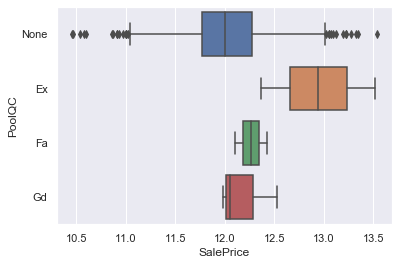

In [86]:
sns.boxplot(x="SalePrice", y="PoolQC", data=with_null)

In [87]:
with_null["Fence"] = with_null["Fence"].fillna("None")

In [88]:
with_null["MiscFeature"] = with_null["MiscFeature"].fillna("None")

In [89]:
with_null["SaleType"] = with_null["SaleType"].fillna(with_null['SaleType'].mode()[0])

In [90]:
all_data = with_null
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
SalePrice,49.982871


## feature engineering

### discrete variable
把數值型的類別變數轉為字串

In [91]:
all_data.select_dtypes(exclude='object').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [92]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['YearBuilt'] = all_data['YearBuilt'].astype(str)
all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)

label encoding

In [93]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'OverallQual', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold')
for i in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[i].values)) 
    all_data[i] = lbl.transform(list(all_data[i].values))

print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 81)


In [94]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2919, 224)

### continuous variable
the continuous variables below need to be checked if they are normal distributed:
'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'WoodDeckSF',
'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal'

In [95]:
cols = [ 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal']

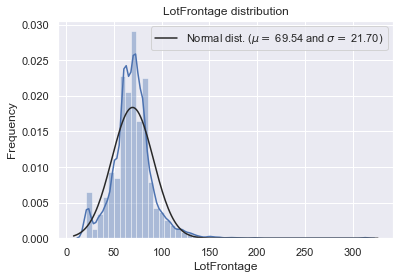

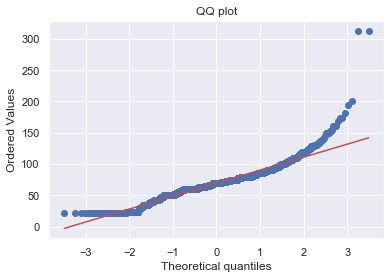

Skewness: 1.506478
Kurtosis: 12.940595


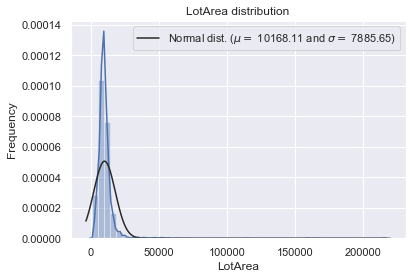

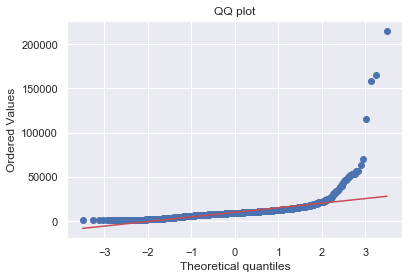

Skewness: 12.829025
Kurtosis: 264.952310


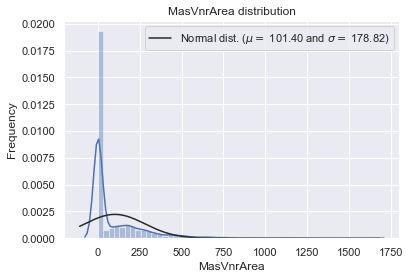

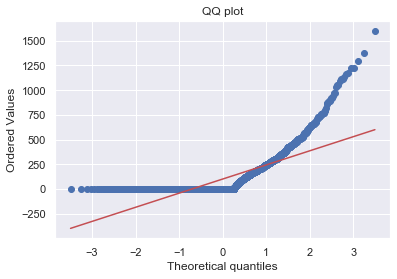

Skewness: 2.614936
Kurtosis: 9.336415


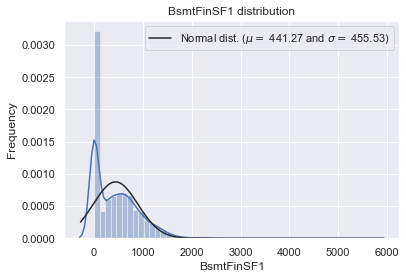

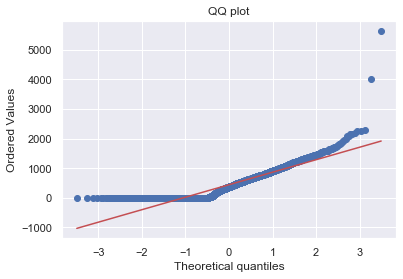

Skewness: 1.425963
Kurtosis: 6.904047


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


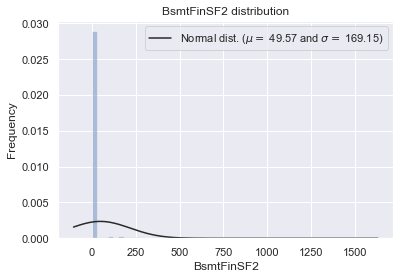

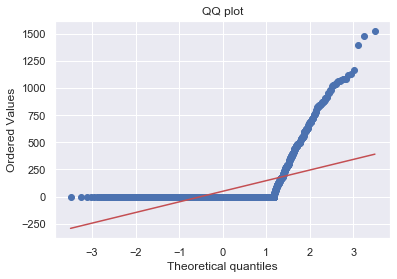

Skewness: 4.148275
Kurtosis: 18.844397


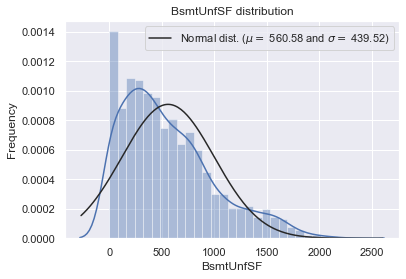

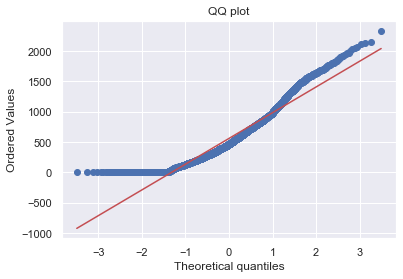

Skewness: 0.919812
Kurtosis: 0.403503


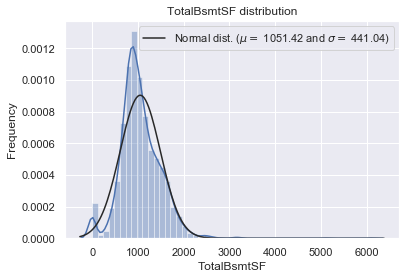

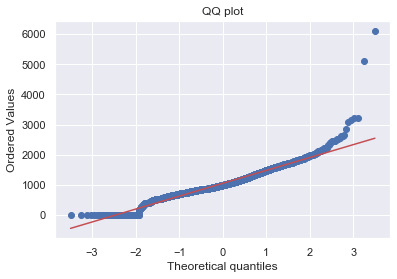

Skewness: 1.157489
Kurtosis: 9.122827


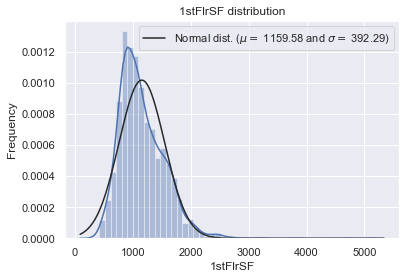

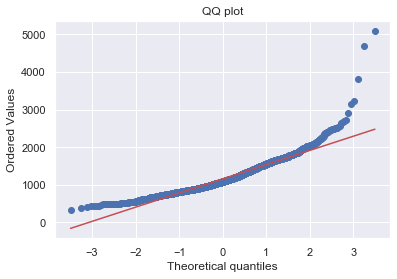

Skewness: 1.470360
Kurtosis: 6.956479


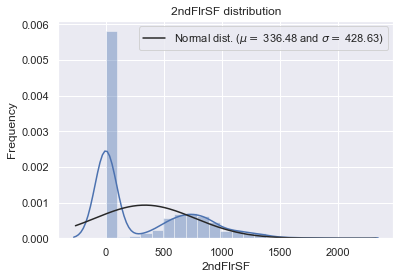

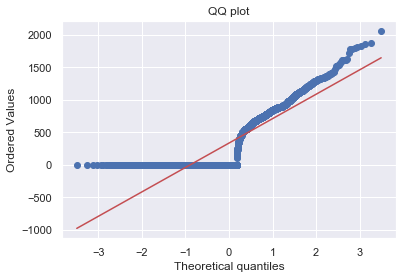

Skewness: 0.862118
Kurtosis: -0.422261


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


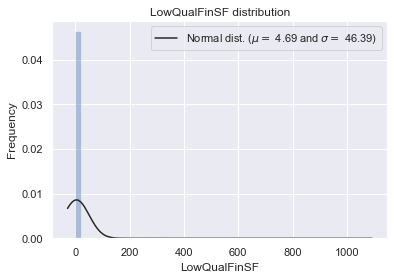

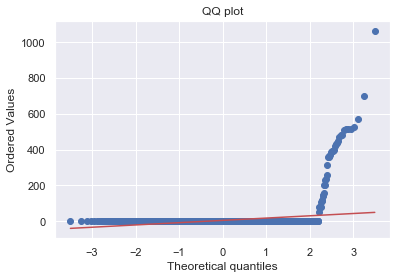

Skewness: 12.094977
Kurtosis: 174.932812


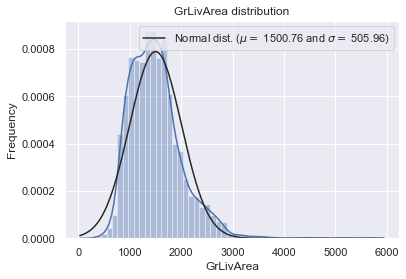

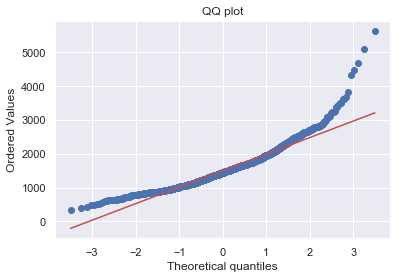

Skewness: 1.270010
Kurtosis: 4.121604


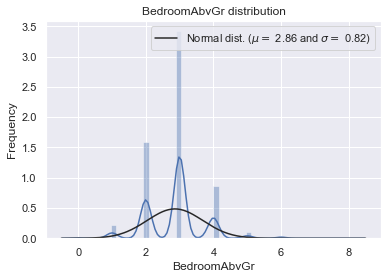

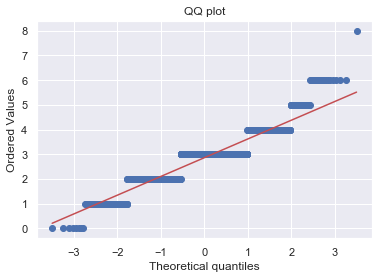

Skewness: 0.326492
Kurtosis: 1.941404


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


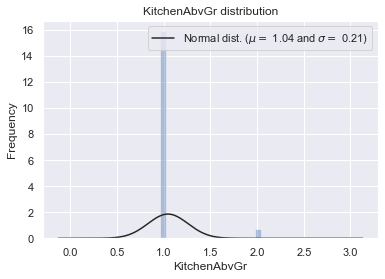

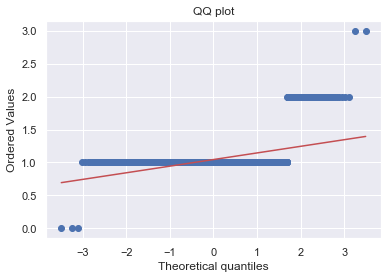

Skewness: 4.304467
Kurtosis: 19.777937


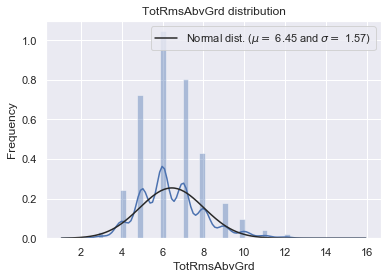

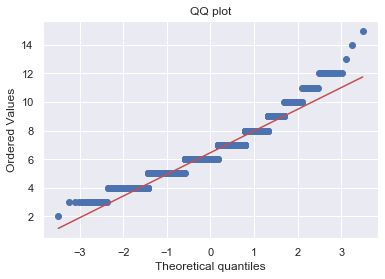

Skewness: 0.758757
Kurtosis: 1.169064


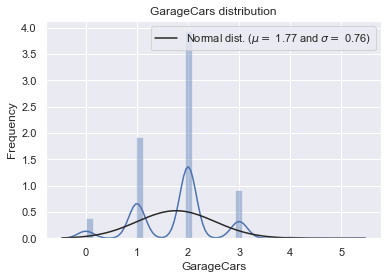

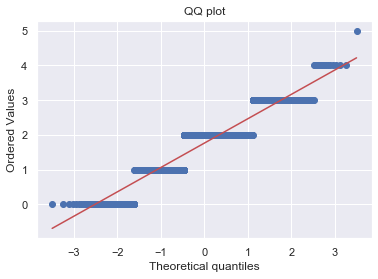

Skewness: -0.219694
Kurtosis: 0.236592


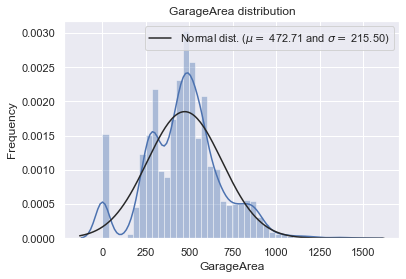

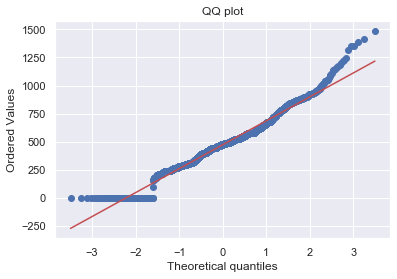

Skewness: 0.239380
Kurtosis: 0.936809


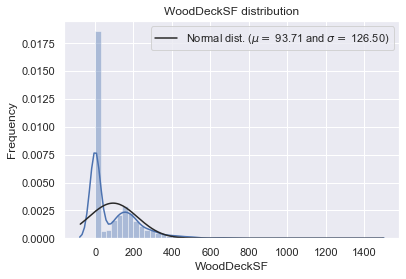

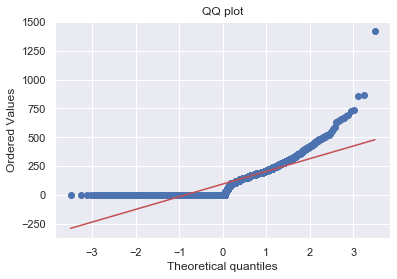

Skewness: 1.843380
Kurtosis: 6.741550


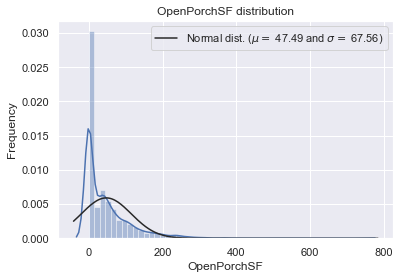

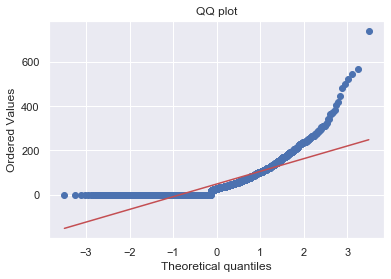

Skewness: 2.536417
Kurtosis: 10.937353


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


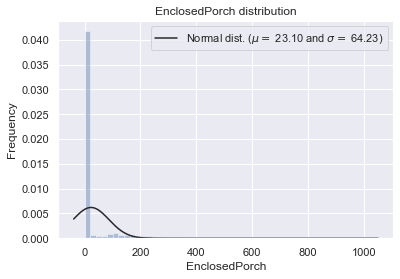

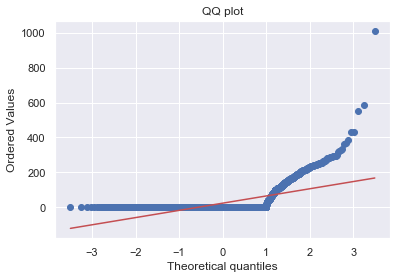

Skewness: 4.005950
Kurtosis: 28.377909


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


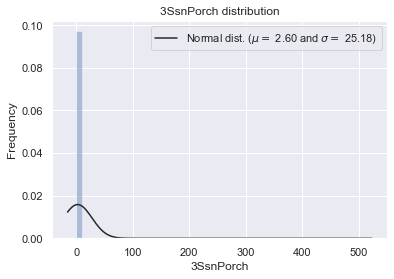

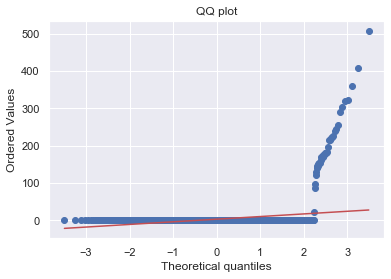

Skewness: 11.381914
Kurtosis: 149.409834


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


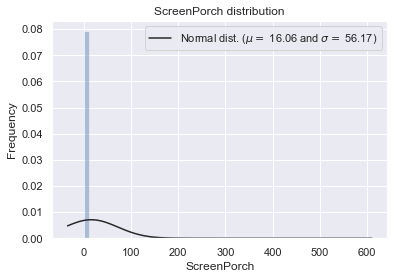

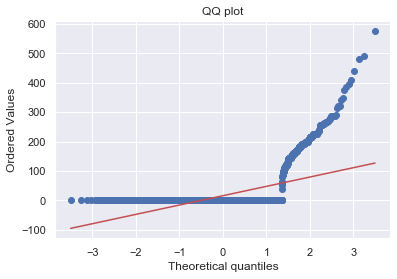

Skewness: 3.948723
Kurtosis: 17.776704


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


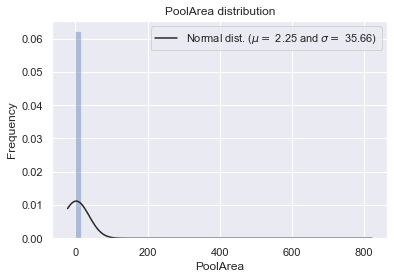

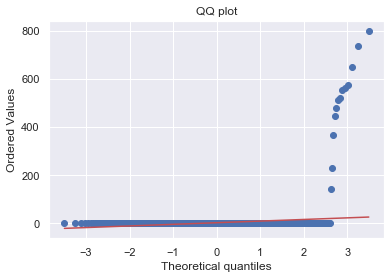

Skewness: 16.907017
Kurtosis: 298.633144


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


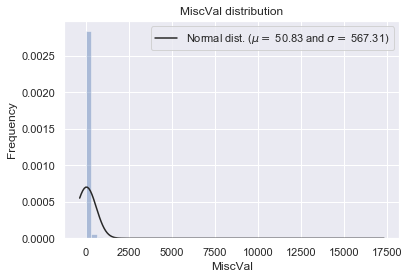

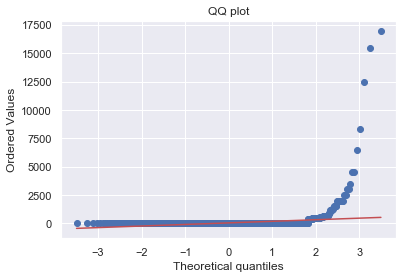

Skewness: 21.958480
Kurtosis: 564.074582


In [96]:
for c in cols:
    sns.distplot(all_data[c],fit=norm)
    mu, sigma = norm.fit(all_data[c])
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title(c + ' distribution')

    fig = plt.figure()
    res = stats.probplot(all_data[c], plot=plt)
    plt.title('QQ plot')
    plt.show()

    print("Skewness: %f" % all_data[c].skew())
    print("Kurtosis: %f" % all_data[c].kurt())

In [97]:
cols_for_transform = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']

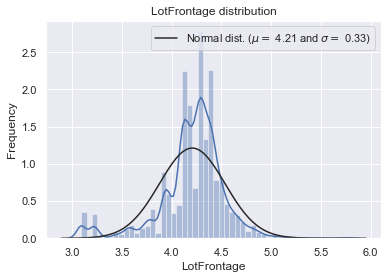

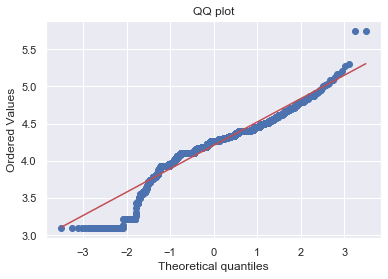

Skewness: -1.024132
Kurtosis: 2.827197


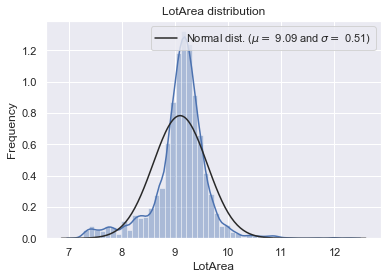

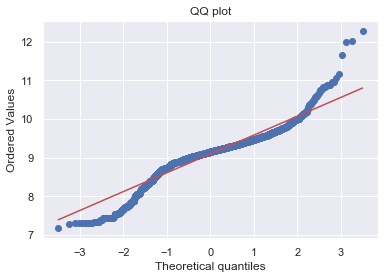

Skewness: -0.505010
Kurtosis: 3.754096


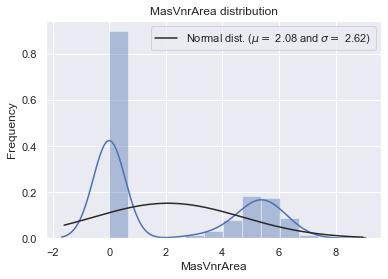

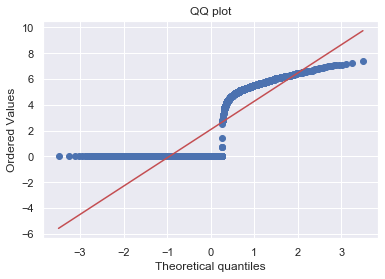

Skewness: 0.537294
Kurtosis: -1.585567


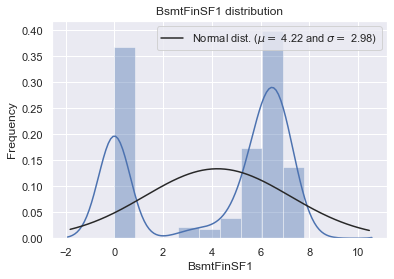

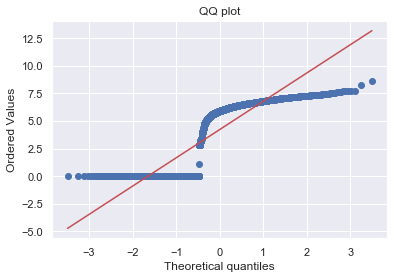

Skewness: -0.616949
Kurtosis: -1.466582


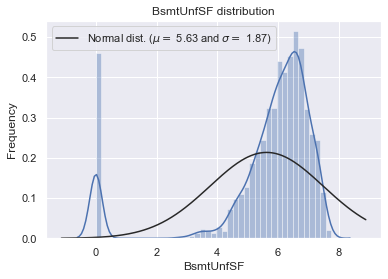

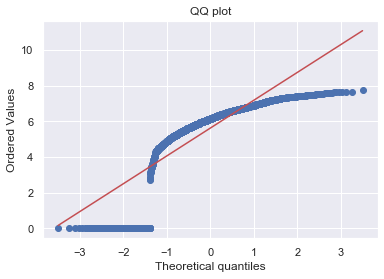

Skewness: -2.156314
Kurtosis: 3.958595


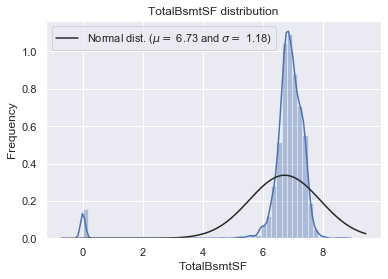

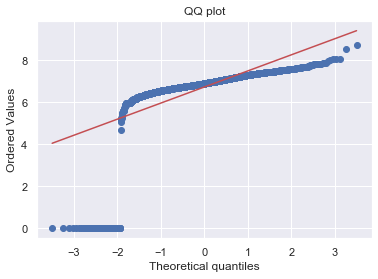

Skewness: -4.958842
Kurtosis: 25.531393


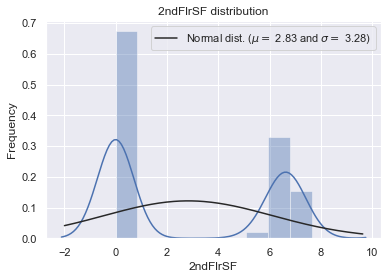

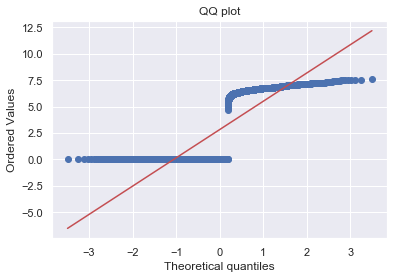

Skewness: 0.305206
Kurtosis: -1.887331


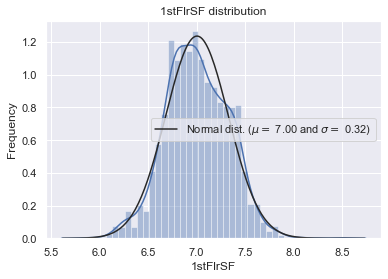

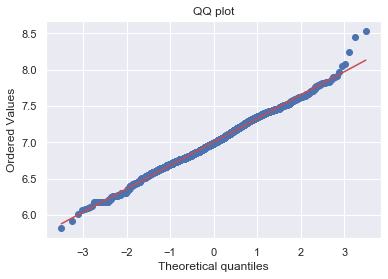

Skewness: 0.064861
Kurtosis: 0.159883


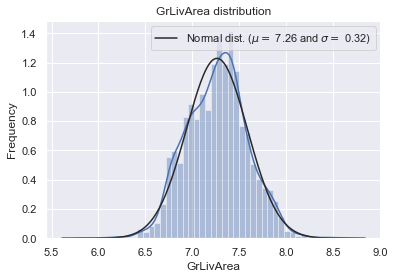

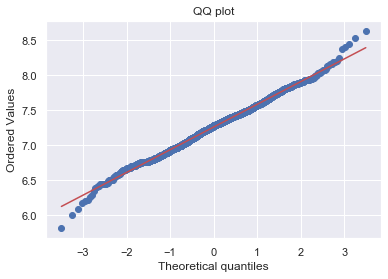

Skewness: 0.013194
Kurtosis: 0.211870


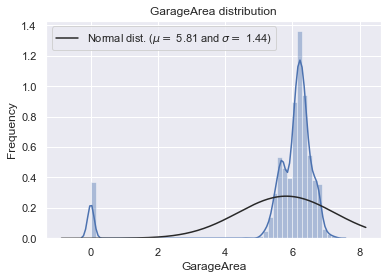

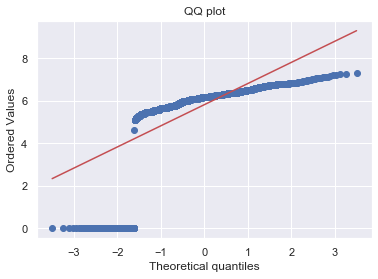

Skewness: -3.512257
Kurtosis: 11.448757


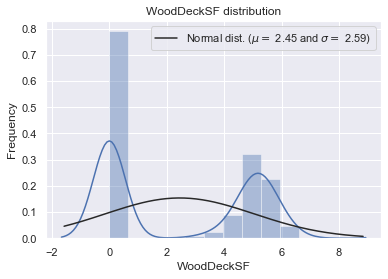

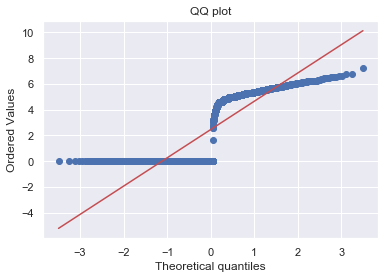

Skewness: 0.158114
Kurtosis: -1.893427


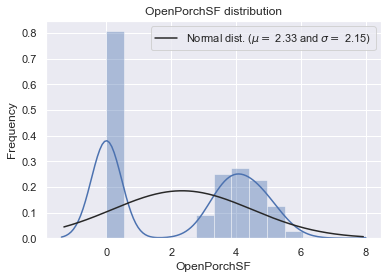

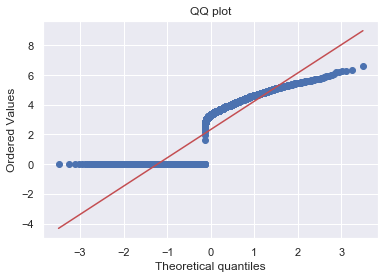

Skewness: -0.041819
Kurtosis: -1.771555


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


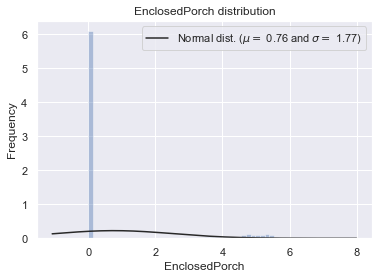

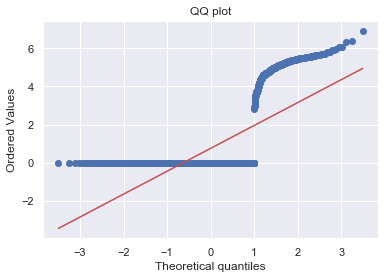

Skewness: 1.962089
Kurtosis: 1.975391


In [98]:
for c in cols_for_transform:
    all_data[c] = np.log1p(all_data[c])
    sns.distplot(all_data[c],fit=norm)
    mu, sigma = norm.fit(all_data[c])
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title(c + ' distribution')

    fig = plt.figure()
    res = stats.probplot(all_data[c], plot=plt)
    plt.title('QQ plot')
    plt.show()

    print("Skewness: %f" % all_data[c].skew())
    print("Kurtosis: %f" % all_data[c].kurt())

## modeling

In [99]:
ntrain = train.shape[0]
ntest = test.shape[0]
train = all_data[:ntrain]
test = all_data[ntrain:]

In [100]:
from sklearn.metrics import mean_squared_error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

XGBoost

In [101]:
model_xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [102]:
y_train = train['SalePrice']

In [103]:
train.drop('SalePrice', axis=1, inplace=True)
train.drop('Id', axis=1, inplace=True)
test.drop('SalePrice', axis=1, inplace=True)
test.drop('Id',axis=1, inplace=True)
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[16:12:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [104]:
xgb_pred

array([129647.6  , 159852.3  , 188502.1  , ..., 152318.83 , 123153.414,
       223887.61 ], dtype=float32)

In [105]:
submission['SalePrice'] = xgb_pred

In [106]:
submission.to_csv('submissionXGB.csv',index=False)

In [107]:
print(rmsle(y_train, xgb_train_pred))

0.07922050870356186


lightGBM

In [108]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [109]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test))

In [110]:
lgb_pred

array([124305.92439656, 158732.34966196, 180378.65799944, ...,
       172788.01785024, 119133.8604756 , 223460.44904874])

In [111]:
submission['SalePrice'] = lgb_pred
submission.to_csv('submission.csv',index=False)
print(rmsle(y_train, lgb_train_pred))

0.0756631069793472


In [112]:
submission['SalePrice'] = lgb_pred
submission.to_csv('submissionLGB.csv',index=False)